$$ \huge{\text{Demonstration of word2vec}} $$
<img src="files/w2v.png">

In [1]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import codecs
import subprocess
import urllib
import numpy as np
%matplotlib inline  

$$ \large{\text{Loading the pre-trained word2vec model}} $$

In [3]:
w2v_wikipedia_en = Word2Vec.load('lexical-substitution/models/w2v/wikipedia/enwiki-20151201.w2v')

$$ \large{\text{Dimensionality reduction using t-SNE}} $$

In [6]:
def visualize_neighbourhood(w2v_model, word, k=10):
    """plots the neighbourhood of a word using tSNE
    Args:
        w2v_model: word2vec model
        word: input word
        k: number of desired neighbours
    Raises:
        KeyError: if word is OOV
    """
    neighbours = w2v_model.most_similar(word, topn=k)
    X = np.zeros([k+1 , 400])
    tsne = TSNE(n_components=2, random_state=0)
    for i in range(len(neighbours)):
        X[i, :] = w2v_model[neighbours[i][0]]
    X[i+1, :] = w2v_model[word]
    result = tsne.fit_transform(X)
    plt.figure(figsize=(16,6))
    plt.scatter(result[:, 0], result[:, 1], s=0, marker='.')
    for i in range(len(neighbours)):
        plt.text(result[i, 0], result[i, 1], neighbours[i][0])
    plt.text(result[i+1, 0], result[i+1, 1], word, color='red')
    plt.show()

$$ \large{\text{Neighbourhood of the word "book"}} $$

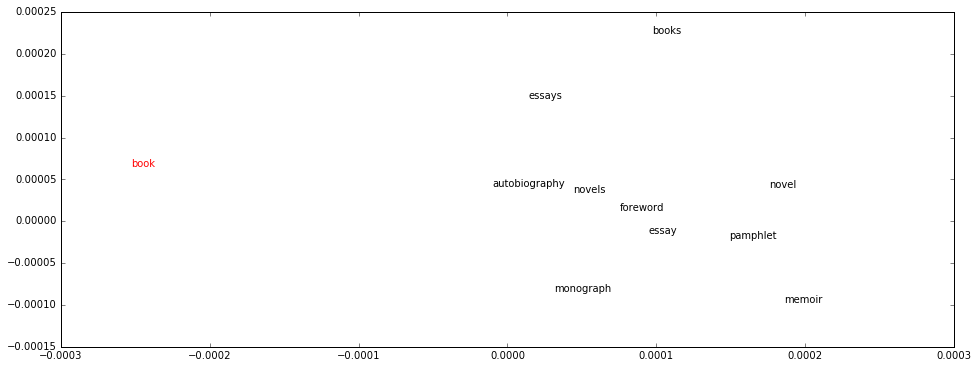

In [13]:
visualize_neighbourhood(w2v_wikipedia_en, 'book', 10)

$$ \large{\text{Neighbourhood of the word "book"}} $$

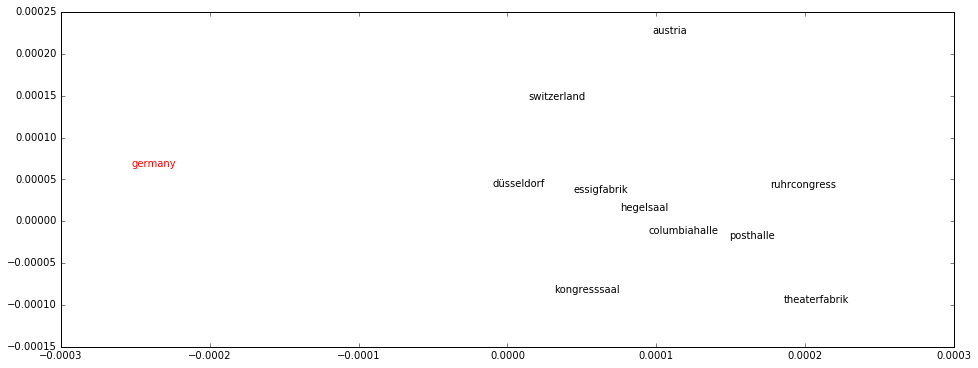

In [24]:
visualize_neighbourhood(w2v_wikipedia_en, 'germany', 10)

$$ \large{\text{Words as 400-dimensional vectors }} v \in \mathbb{R}^{400}$$

In [29]:
w2v_wikipedia_en['germany']

array([  5.82635514e-02,   5.52553013e-02,   3.47167463e-03,
        -4.27852897e-03,  -7.89960623e-02,   1.15176231e-01,
         3.07003092e-02,  -6.53509274e-02,   5.12828231e-02,
        -1.97905470e-02,  -2.70551592e-02,  -1.24751203e-01,
        -5.56207076e-03,   4.75935172e-03,   8.82300176e-03,
        -3.30230431e-03,  -6.35628477e-02,  -3.77361998e-02,
        -1.02111343e-02,  -7.25169899e-03,   2.35849456e-03,
        -1.97681803e-02,  -6.14834614e-02,  -2.36857589e-02,
         2.40452811e-02,   2.24066116e-02,   1.69912111e-02,
         5.78525402e-02,   3.61758750e-04,  -2.19463818e-02,
        -2.33208947e-02,   7.15567321e-02,  -2.39357240e-02,
         5.82743064e-02,  -4.70406823e-02,  -7.76249617e-02,
         9.23901349e-02,   1.14911005e-01,   3.19458172e-02,
         4.18922007e-02,   9.11388453e-03,   3.37055326e-02,
        -3.95510793e-02,   6.82925507e-02,  -5.28344773e-02,
        -3.44380960e-02,  -9.38619599e-02,  -1.57333445e-02,
         7.28465803e-03,

$$ \large{\text{king + woman - man = ?}}$$

In [36]:
w2v_wikipedia_en.most_similar(positive=['woman', 'king'], negative=['man'])

[(u'queen', 0.5110929012298584),
 (u'regnant', 0.4575003981590271),
 (u'prince', 0.4468516707420349),
 (u'vajiravudh', 0.44607308506965637),
 (u'coronation', 0.44080594182014465),
 (u'rajaruchi', 0.43458330631256104),
 (u'buvanekabahu', 0.43388882279396057),
 (u'monarch', 0.422675222158432),
 (u'senkamanisken', 0.4192367196083069),
 (u'fulstan', 0.41780391335487366)]

$$ \large{\text{spain + berlin - germany = ?}}$$

In [40]:
w2v_wikipedia_en.most_similar(positive=['spain', 'berlin'], negative=['germany'])

[(u'madrid', 0.6456993818283081),
 (u'valencia', 0.6417372226715088),
 (u'barcelona', 0.6399350762367249),
 (u'seville', 0.6125329732894897),
 (u'bilbao', 0.6065897941589355),
 (u'alicante', 0.6051338315010071),
 (u'm\xe1laga', 0.5936022400856018),
 (u'malaga', 0.5930505394935608),
 (u'murcia', 0.5925484895706177),
 (u'zaragoza', 0.5913836359977722)]

$$\large{\text{Which word does not match? (Gauss, Hilbert, Riemann, Merkel)}}$$

In [54]:
w2v_wikipedia_en.doesnt_match("gauss hilbert merkel riemann".split())

'merkel'

$$\large{\text{Which word does not match? (Germany, Bier, Italy, Berlin)}}$$

In [65]:
w2v_wikipedia_en.doesnt_match("germany bier berlin italy ".split())

'bier'